In [11]:
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
from Autoencoder import Autoencoder
import yaml
import os
import cv2
import numpy as np
from Autoencoder_big import Autoencoder_Modified

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

# Instantiate the model and set to eval mode
model = Autoencoder()

# Load model.pth if exists
try:
	model.load_state_dict(torch.load("C:/Users/Usuario/Documents/GitHub/MED-GIA/AnomalyDetection/models/model.pth"))
except FileNotFoundError:
	print("No model.pth found")
model.to(device)
model.eval()

# Define a transform to preprocess the image
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),  # Converts to [0, 1] range
])

# Load data path
with open("../config.yml", "r") as file:
	config = yaml.safe_load(file)
	data_path = config["annotated_data_path"]

Using cuda device


C:\Users\Usuario\AppData\Local\Temp\ipykernel_2508\3467082980.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("C:/Users/Usuario/Documen

RuntimeError: Error(s) in loading state_dict for Autoencoder:
	size mismatch for encoder.0.weight: copying a param with shape torch.Size([16, 4, 3, 3]) from checkpoint, the shape in current model is torch.Size([16, 3, 3, 3]).
	size mismatch for decoder.6.weight: copying a param with shape torch.Size([16, 4, 3, 3]) from checkpoint, the shape in current model is torch.Size([16, 3, 3, 3]).
	size mismatch for decoder.6.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([3]).

In [7]:

# Load and preprocess the image
image = Image.open(os.path.join(data_path, "B22-25_0/02816.png")).convert('RGB') # Negative
#image = Image.open(os.path.join(data_path, "B22-46_0/01039.png")).convert('RGB') # Positive
# TODO: remove alpha channel
input_image = transform(image).unsqueeze(0) # Add batch dimension
print(input_image.shape)

torch.Size([1, 3, 256, 256])


In [8]:
# Perform a forward pass to get the reconstructed image
with torch.no_grad():
    reconstructed_image = model(input_image.to(device))

In [9]:
print(reconstructed_image)

tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]], device='cuda:0')


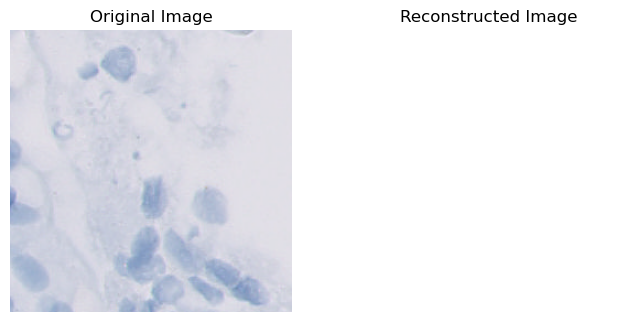

In [10]:
# Convert tensors to images for visualization
input_image_np = input_image.squeeze(0).permute(1, 2, 0).numpy()
reconstructed_image_np = reconstructed_image.cpu().squeeze(0).permute(1, 2, 0).numpy()#*255

# Display the original and reconstructed images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(input_image_np)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image_np)
plt.axis("off")

plt.show()